# Creating the frame
The purpose of this notebook is to create the wireframe for the dataset.

In [1]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.abspath('../../building_road_segmentation'))

import building_road_segmentation
import tensorflow as tf
import tensorflow.keras

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps

import glob
import os
/
import geopandas as gpd
import rasterio
import rasterio.features
from rasterio.merge import merge
from rasterio.plot import show

In [2]:

data_directory = 'D:\Capstone Project\data\\'
directories_dicts = [building_road_segmentation.get_directories_dictionary(data_directory, data_index) for data_index in range(4)]
image_names = [np.load(g) for g in glob.glob('*_to_keep.npy')]

In [3]:
#image_names

In [4]:
#directories_dicts

In [5]:
key = 'RGB-PanSharpen'
X_paths = []
y_paths = []
for k in range(4):
    for image_name in image_names[k]:
        X_paths.append(building_road_segmentation.get_image_path(directories_dicts[k], key, image_name))
        y_paths.append([building_road_segmentation.get_road_mask_path(directories_dicts[k], image_name), building_road_segmentation.get_building_mask_path(directories_dicts[k], image_name)])

In [6]:
len(X_paths)

4782

In [7]:
new_size = (128, 128)
from PIL.ImageFilter import (
    GaussianBlur
    )
for k in range(len(X_paths)):
    with rasterio.open(X_paths[k]) as image:
        rast_img = image.read()
        array = np.clip(np.moveaxis(rast_img/np.max(rast_img) * 255, 0, 2), 0, 255).astype(np.uint8)
        img = Image.fromarray(array)
        img = PIL.ImageOps.equalize(img)
        img = img.resize(new_size,Image.BICUBIC)
        img.save("final_images_small\\" + X_paths[k].split("\\")[-1].replace(".tif", '') + '.png')
        m0 = np.load(y_paths[k][0])
        m1 = np.load(y_paths[k][1])
        m2 = m0 * 0
        img_mask = [np.array(Image.fromarray(m0).convert('L').filter(GaussianBlur(radius=5)).resize(new_size, Image.BICUBIC)), 
                    np.array(Image.fromarray(m1).convert('L').resize(new_size,Image.BICUBIC))]
        mask = np.ceil(np.clip(np.array(np.moveaxis(img_mask, 0, 2)), 0, 1))
        mask[mask > 0] = 1
        np.save("final_masks_small\\" + X_paths[k].split("\\")[-1].replace(".tif", '') + '.npy', mask)

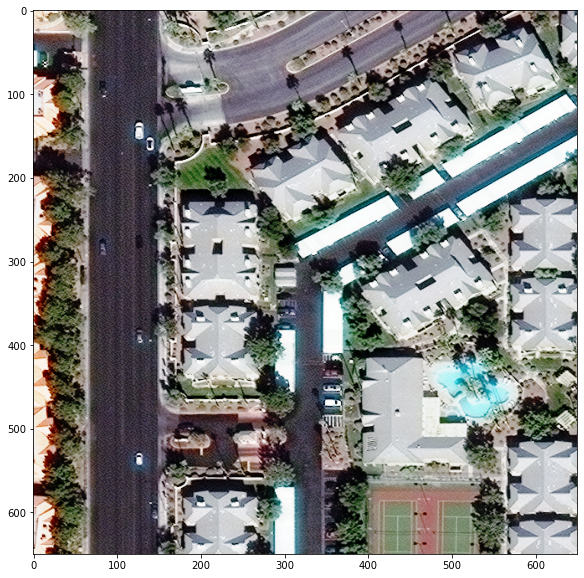

In [11]:

with rasterio.open(X_paths[500]) as image:
    plt.figure(figsize=(10, 10))
    img = Image.fromarray(np.clip(np.moveaxis(image.read()/np.max(image.read()) * 255, 0, 2), 0, 255).astype(np.uint8))
    img = PIL.ImageOps.equalize(img)
    array = np.array(img).astype(np.uint8)
    plt.imshow(array)

In [16]:
road_positives = 0
building_positives = 0
for k in range(len(X_paths)):
    mask = np.load("final_masks_small\\" + X_paths[k].split("\\")[-1].replace(".tif", '') + '.npy')
    road_positives += np.sum(mask[:, :, 0])
    building_positives += np.sum(mask[:, :, 1])

In [18]:
road_positives /(len(X_paths) * 128 * 128)

0.13263165367442362

In [19]:
building_positives /(len(X_paths) * 128 * 128)

0.22823995847873535

In [12]:
k=50
mask = np.load("final_masks_small\\" + X_paths[k].split("\\")[-1].replace(".tif", '') + '.npy')

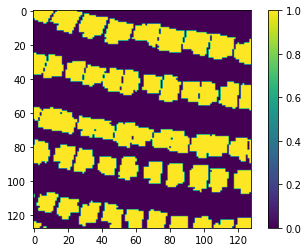

In [15]:
plt.imshow(mask[:, :, 1], vmax=1, vmin=0)
plt.colorbar()

In [42]:
print(X_paths[k])

D:\Capstone Project\data\AOI_2_Vegas_Train\RGB-PanSharpen\RGB-PanSharpen_AOI_2_Vegas_img2365.tif


In [9]:
np.sum(mask, axis=2)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float16)

In [42]:
np.isnan(mask).sum()

0